# P0: Intro

Sentiment Analysis is a Natural Language Processing technique that allows us to determine the sentiment or opinion of a given text. It is a very useful technique that allows us to extract insights from social media, customer feedback, product reviews, etc. This assignment focuses on building a sentiment classifier using the SVM algorithm. You are given a dataset of tweets along with their corresponding sentiments. Your task is to build a classifier that can determine the sentiment of a given tweet.

# P1: Data Exploration

The dataset provided to you includes one file: `sentiment.csv`.
Run the below cells to download the data.

In [1]:
import gdown
import pandas as pd


data = pd.read_csv(r"D:\Sharif University of Tech\AI Boot Camp\HW\HW4\SVM\Data\Tweet Data.csv")
data.head()

,Unnamed: 0,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## The Distribution of Labels

Extract the labels of the Sentiment column and plot the distribution of samples according to it. 

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


<Axes: title={'center': 'Sample Sentiment Counts'}>

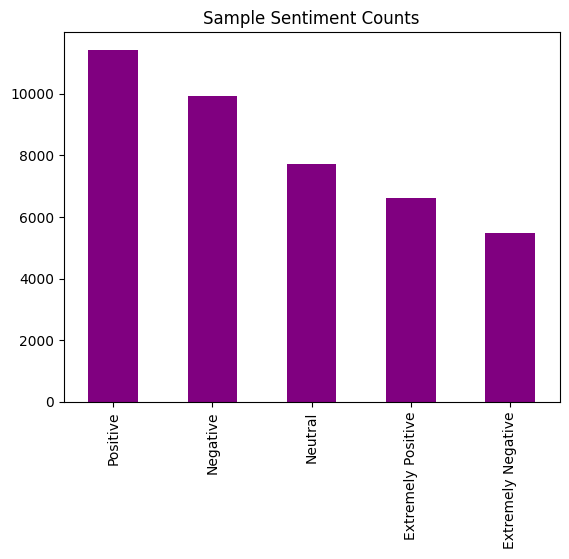

In [2]:
labels = data["Sentiment"].values
print(data["Sentiment"].unique())
pd.Series(labels).value_counts().plot.bar(color="purple",title="Sample Sentiment Counts")

## Texts Distribution

Plot the distribution of tweets according to their lengths.

<Axes: title={'center': 'number of words'}, ylabel='Frequency'>

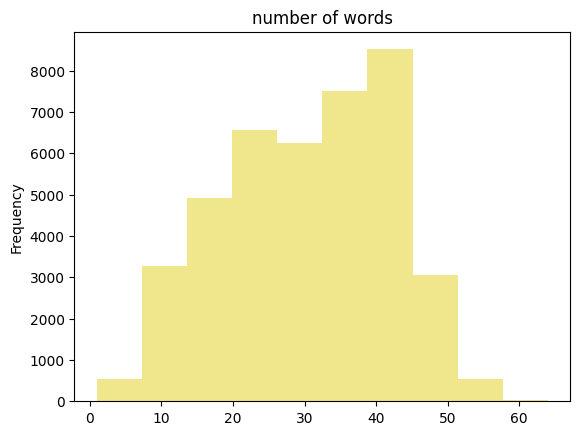

In [3]:
OriginalTweet = data["OriginalTweet"]
len_tweets = OriginalTweet.apply(lambda x: len(x.split()))
len_tweets.plot.hist(color="khaki", title="number of words")

<Axes: title={'center': 'number of characters'}, ylabel='Frequency'>

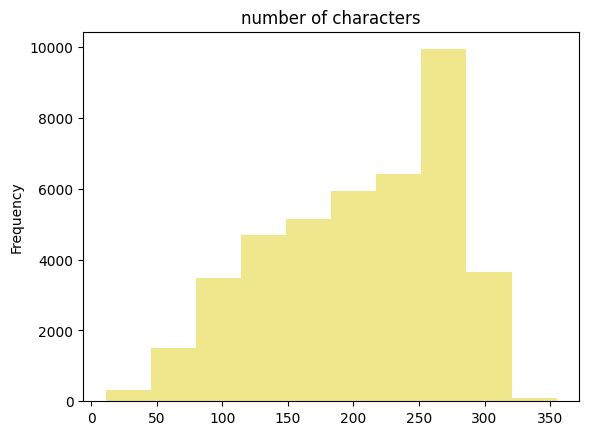

In [4]:
len_tweets_c = OriginalTweet.str.len()
len_tweets_c.plot.hist(color="khaki", title="number of characters")

## Outliers

According to the obtained distributions, reason whether it is necessary to remove outliers or not. If your answer is yes, determine the appropriate remove range and delete these outliers in the dataset cleaning section.

Answer:
WE should remove outliers because they dont represent the data and can affect the model performance adversely by causing overfitting.
</br>
We aint gonna do it on the sentiments as they are categorical and we dont have any outliers there (around same size each one not one being too few).
</br>
But the thing that really affects our model is the tweets themselves. Some have lengths that are far from the normal range and we should remove them.

In [5]:
a = len_tweets.value_counts().sort_index()
print(a[a<15])

OriginalTweet
1      2
2     12
58     9
59    10
60     1
61     1
62     1
64     1
Name: count, dtype: int64


In [6]:
# we should remove outliers because they are not representative of the data, a few are too short and a few are too long.
data_clean = data[(len_tweets > 2) & (len_tweets < 60)]
data_clean = data_clean.reset_index(drop=True)
data_clean.head()

,Unnamed: 0,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Missing Values

What percentage of dataset rows should be deleted due to missing values? Delete these row in the dataset cleaning section.

In [7]:
count = data_clean.isnull().sum()
print(count)
print(f"{max(count)/len(data)*100}% of the data rows should be deleted.")


Unnamed: 0          0
UserName            0
ScreenName          0
Location         8584
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64
20.856719391598027% of the data rows should be deleted.


## Most Frequent Words

Use the `nltk` library and plot the 30 most frequent words in order of occurrence. Then do this for each set of positive, negative and neutral tweets separately.

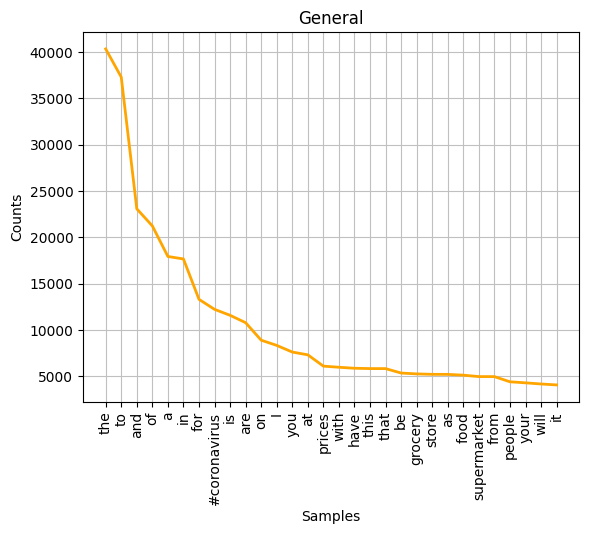

Neutral


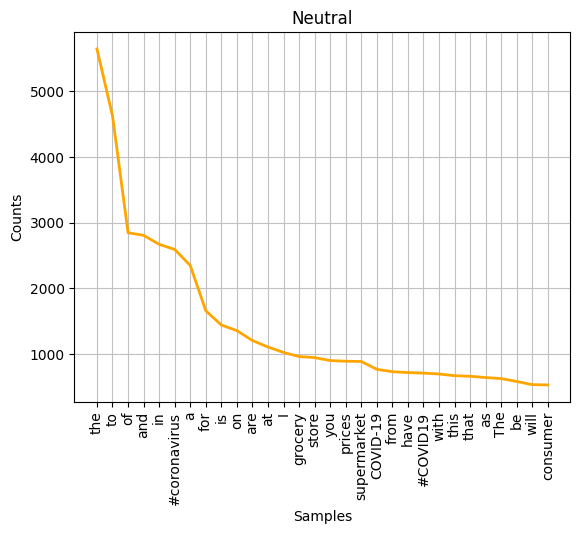

Positive


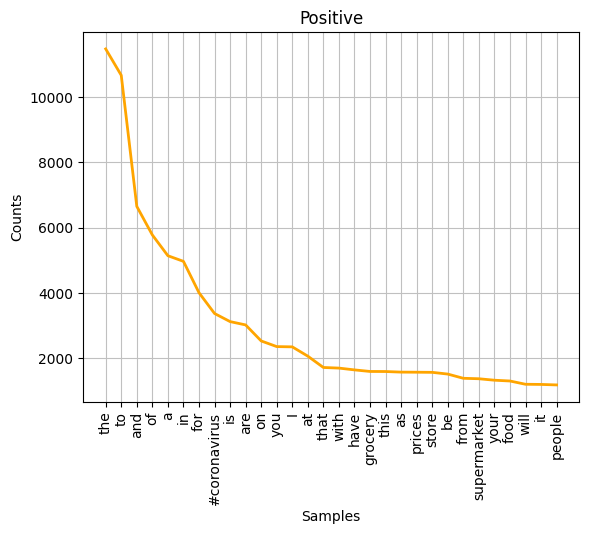

Extremely Negative


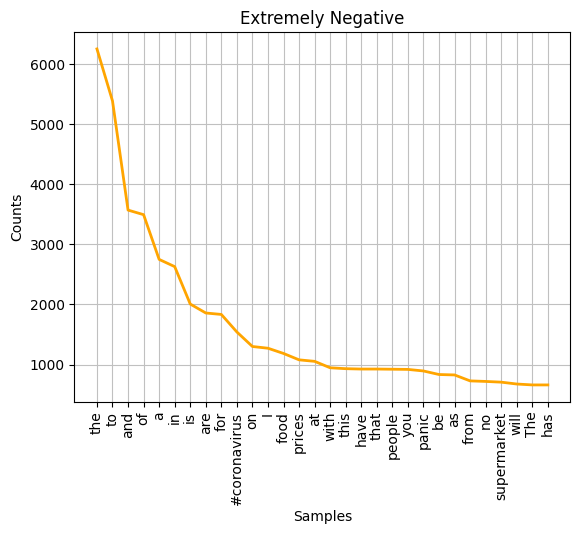

Negative


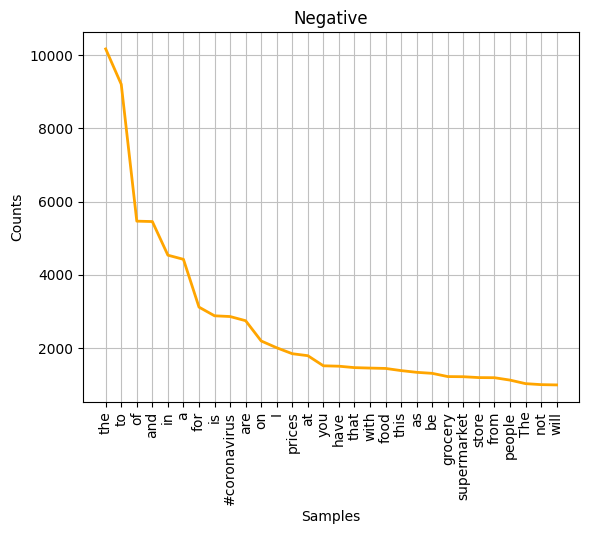

Extremely Positive


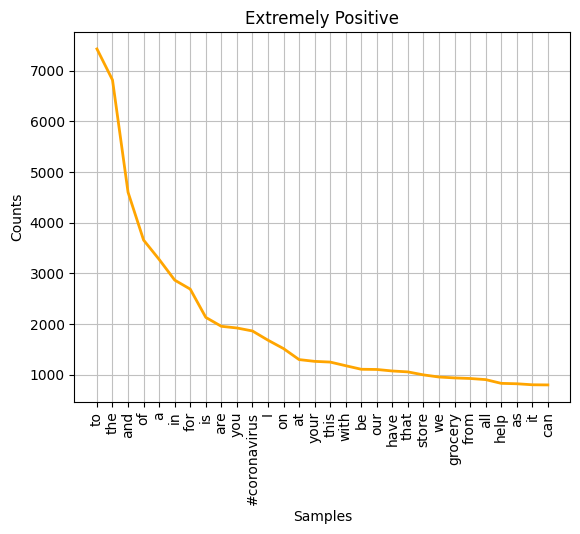

In [8]:
import nltk
words = []
for tweet in data_clean["OriginalTweet"]:
    words += tweet.split()
freqdist = nltk.FreqDist(words)
freqdist.plot(30, color="orange",title="General")

sentiments = data_clean["Sentiment"].unique()
for i in sentiments:
    print(i)
    words = []
    for tweet in data_clean[data_clean["Sentiment"] == i]["OriginalTweet"]:
        words += tweet.split()
    freqdist = nltk.FreqDist(words)
    freqdist.plot(30, color="orange",title=i)


# P2: Preprocessing

## Dataset Cleaning

Remove unrelevant columns and do other necessary cleanings. 

In [9]:
print(data_clean["UserName"].value_counts().max())
print(data_clean["ScreenName"].value_counts().max())
print(data_clean["Location"].value_counts().max())
print(data_clean["TweetAt"].value_counts().max())

1
1
540
3447


so using username or screen name really does not make sense as they are only for one tweet each

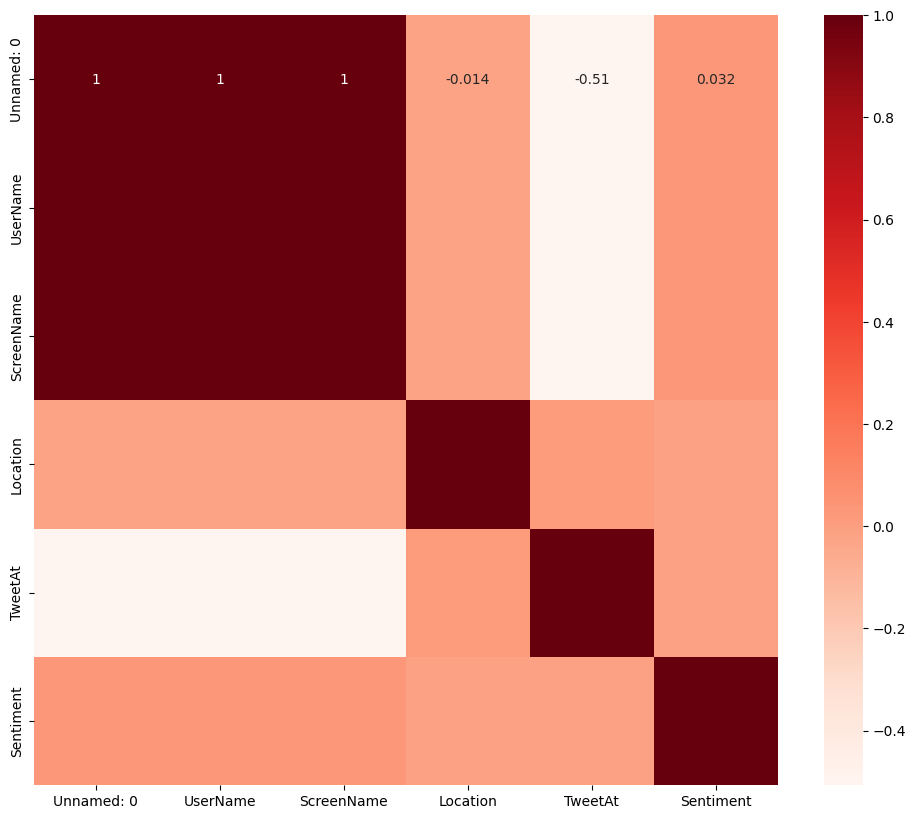

In [10]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
data_clean2 = data_clean.copy()
data_clean2["Sentiment"] = l1.fit_transform(data_clean2["Sentiment"])
data_clean2["Location"] = l1.fit_transform(data_clean2["Location"])
data_clean2["ScreenName"] = l1.fit_transform(data_clean2["ScreenName"])
data_clean2["TweetAt"] = l1.fit_transform(data_clean2["TweetAt"])
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
data_clean2.drop(columns={'OriginalTweet'},inplace=True)
cor = data_clean2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

we see that Location and TweetAt are not really useful as they have a quite small correlation with the sentiment and we can remove them

In [11]:
df = data_clean.dropna()
df = df.reset_index(drop=True)
df = df[['OriginalTweet', 'Sentiment']]
df = df.drop_duplicates()
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,As news of the regionÂs first confirmed COVID...,Positive
4,Cashier at grocery store was sharing his insig...,Positive


## Labeling

Based on the `Sentiment` column, generate 3 labels by considering the extremely positive tweets as positive and the extremely negative ones as negatives.

In [12]:
df["Sentiment"] = df["Sentiment"].replace("Extremely Positive", "Positive")
df["Sentiment"] = df["Sentiment"].replace("Extremely Negative", "Negative")
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,As news of the regionÂs first confirmed COVID...,Positive
4,Cashier at grocery store was sharing his insig...,Positive


In [13]:
df["Sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sentiment"] = le.fit_transform(df["Sentiment"])
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,advice Talk to your neighbours family to excha...,2
2,Coronavirus Australia: Woolworths to give elde...,2
3,As news of the regionÂs first confirmed COVID...,2
4,Cashier at grocery store was sharing his insig...,2


## Text Cleaning

Remove urls from tweets with regex. (Use pattern `r'https?://\S+|www\.\S+'`) 

In [15]:
import re
df["OriginalTweet"] = df["OriginalTweet"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "", x))
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv and and,1
1,advice Talk to your neighbours family to excha...,2
2,Coronavirus Australia: Woolworths to give elde...,2
3,As news of the regionÂs first confirmed COVID...,2
4,Cashier at grocery store was sharing his insig...,2


Remove everything except alphabetical and numerical characters. (Use pattern `[^a-zA-Z0-9]`) 

In [16]:
df["OriginalTweet"] = df["OriginalTweet"].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x))
df.head()

,OriginalTweet,Sentiment
0,MeNyrbie Phil Gahan Chrisitv and and,1
1,advice Talk to your neighbours family to excha...,2
2,Coronavirus Australia Woolworths to give elde...,2
3,As news of the region s first confirmed COVID...,2
4,Cashier at grocery store was sharing his insig...,2


Lower all letters. Then use `nltk` and tokenize tweets. Then replace each word with its root and remove the stopwords. 

In [17]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df["OriginalTweet"] = df["OriginalTweet"].apply(lambda x: x.lower())
df["OriginalTweet"] = df["OriginalTweet"].apply(lambda x: nltk.word_tokenize(x))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df["OriginalTweet"] = df["OriginalTweet"].apply(lambda x: [stemmer.stem(word) for word in x])

from nltk.corpus import stopwords
stopwords = stopwords.words("english")
df["OriginalTweet"] = df["OriginalTweet"].apply(lambda x: [word for word in x if word not in stopwords])
df["OriginalTweet"] = df["OriginalTweet"].apply(lambda x: " ".join(x))
df.head()

,OriginalTweet,Sentiment
0,menyrbi phil gahan chrisitv,1
1,advic talk neighbour famili exchang phone numb...,2
2,coronaviru australia woolworth give elderli di...,2
3,news region first confirm covid 19 case came s...,2
4,cashier groceri store wa share hi insight covi...,2


## Feature Generation

Use `CountVectorizer` class (belonging to `sklearn`) construct a feature vector from each tweet.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=300)
v = vectorizer.fit_transform(df["OriginalTweet"])
v = v.toarray()
print(v.shape)
print(len(df))
X = v
y = df["Sentiment"].values

(32555, 300)
32555


# P3: Modeling

Convert the dataset to a dataframe (or some `numpy` arrays) and split it into train and test sets.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:15000],y[:15000],test_size=0.2,shuffle = True, random_state=42)

Use the `SVC` class (belonging to `sklearn`) to train a SVM classifier.

In [21]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
clf = OneVsOneClassifier(SVC())
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.653

Complete the definition of the following class to implement a SVM classifier capable of separating only the positive and negative classes. 

In [23]:
import cvxopt
from cvxopt import matrix as cvxm
from cvxopt import solvers as cvxs
import numpy as np
from sklearn.metrics import accuracy_score

In [24]:
from collections import Counter
from itertools import combinations

In [25]:
class SVM:
    def __init__(self, kernel='linear', C=0.1, degree=3, num_classes=3):
        """
        you can set your kernel between linear or rbf or polynomial with the degree of your choice
        If you need any other kernel just add it in my compute_kernel function
        you can predefine C for the qp algorithm here too
        num_classes is for when you are using the one vs one classifier functions
        """
        self.w = None
        self.b = None
        self.kernel = kernel
        self.C = C
        self.degree = degree
        self.num_classes=num_classes

    def convert_y(self, y, minusOne=None):
        """
        This function makes class binary -1 and 1
        for the choice you can either set what should be minusOne using the input argument
        or the default which I use the minimum as -1
        """
        ma = y.max()
        mi = y.min()
        if minusOne is None:
            y[y == mi] = -1
            y[y == ma] = 1
        else:
            indices = np.where((y==minusOne))
            y[True] = 1
            y[indices] = -1

        return y

    def compute_kernel(self, X):
        """
        Computiing various kernels
        """
        if self.kernel == 'linear':
            return np.dot(X, X.T)
        elif self.kernel == 'rbf':
            gamma = 1.0 / X.shape[1]
            K = np.zeros((X.shape[0], X.shape[0]))
            for i, x_i in enumerate(X):
                for j, x_j in enumerate(X):
                    K[i, j] = np.exp(-gamma * np.linalg.norm(x_i - x_j) ** 2)
            return K
        elif self.kernel == "d polynomial":
            return (np.dot(X, X.T) + 1)** self.degree


    def fit(self, X, y, minusOne=None):
        """Fit the SVM model to dataset X in one-vs-one manner.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where `n_samples` is the number of samples
            and `n_features` is the number of features.

        y : array-like of shape (n_samples,)
            Training labels, where `n_samples` is the number of samples.

        Returns
        -------
        self : object
            Returns the instance itself.
        """

        ############ Your Code ############
        # STEPS (For each of the classifiers you would need to train)
        # 1. Setup SVM objective function in QP form
        # 2. Solve the QP problem and get the optimal lagrange multipliers
        # 3. Get support vectors and calculate the weight vector

        # I made y binary between -1 and 1
        y = self.convert_y(y, minusOne).reshape(-1,1).astype(float)

        n_samples, n_features = X.shape
        # btw Im using the dual form of the SVM bcuz of convenience and efficienct
        P = np.outer(y, y) * self.compute_kernel(X).astype(float)
        q = -np.ones((n_samples, 1)).astype(float)
        G = np.vstack((-np.eye(n_samples), np.eye(n_samples))).astype(float)
        h = np.hstack((np.zeros(n_samples), self.C * np.ones(n_samples))).astype(float)
        A = y.reshape(1, -1)
        b = np.zeros(1).astype(float)
        sol = cvxs.qp(cvxm(P), cvxm(q), cvxm(G), cvxm(h), cvxm(A), cvxm(b))
        lms = np.array(sol['x']).reshape(-1)
        alphas = lms[lms > 1e-4]
        support_vectors = X[lms > 1e-4]
        svlabels = y[lms > 1e-4].flatten()
        self.w = np.dot(svlabels * alphas,support_vectors)
        self.b = np.mean(svlabels - support_vectors @ self.w.T)
        return self

    def fit_ovo(self, X, y):
        """ This is my implementation for OneVvOne Classifier for my svm class
        just use it same as normal fitting but no need to make y binary class :)

        """
        unique_classes = np.unique(y)
        self.uniques = unique_classes
        classifiers = {}
        for class1, class2 in combinations(unique_classes, 2):
            print("classes",class1,class2)
            subset_indices = np.where((y == class1) | (y == class2))
            X_subset, y_subset = X[(y == class1) | (y == class2)], y[(y == class1) | (y == class2)]
            self.fit(X_subset,y_subset, minusOne=class2)

            classifiers[(class1, class2)] = [self.w,self.b]

        self.classifiers = classifiers
        return classifiers

    def transform_ovo(self, X):
        """
        The transform function for the case of multiclass svm
        """
        classifiers = self.classifiers
        n_samples = X.shape[0]
        class_votes = np.zeros((n_samples, 3))
        for (class1, class2), s in classifiers.items():
            self.w = s[0]
            self.b = s[1]
            binary_predictions = self.transform(X)
            class_votes[binary_predictions == 1, class1] += 1
            class_votes[binary_predictions == -1, class2] += 1
        final_predictions = np.argmax(class_votes, axis=1)
        return final_predictions,class_votes


    def transform(self, X):
        """Fit the model with X and apply the dimensionality reduction on X.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where `n_samples` is the number of samples
            and `n_features` is the number of features.

        Returns
        -------
        y_pred : ndarray of shape (n_samples)
            Your predictions for the class of each sample
        """

        ############ Your Code ############
        f = X @ self.w + self.b
        return np.sign(f).flatten()

    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples, where `n_samples` is the number of samples
            and `n_features` is the number of features.

        y : array-like of shape (n_samples,)
            True labels for `X`.

        Returns
        -------
        score : float
            Mean accuracy of self.predict(X) wrt. y.
        """

        ############ Your Code ############
        # This is only for the binary class of mine. transform is enough for you to get
        # the prediction of the multiclass version
        y = self.convert_y(y)
        return accuracy_score(y, self.transform(X))


Train the binary SVM classifier using the class you have implemented.

In [26]:
# only positive and negative tweets (binary version)
Xpn = X[y != 1]
ypn = y[y != 1]
Xpn = Xpn[:5000] #because of kaggle memory limit
ypn = ypn[:5000]
Xpn_train, Xpn_test, ypn_train, ypn_test = train_test_split(Xpn,ypn,test_size=0.1,shuffle = True, random_state=42)
svm_bi = SVM()
svm_bi.fit(Xpn_train, ypn_train)

     pcost       dcost       gap    pres   dres
 0: -1.6283e+03 -1.1450e+03  4e+04  3e+01  4e-14
 1: -2.8658e+02 -1.0952e+03  3e+03  2e+00  4e-14
 2: -2.0641e+02 -7.1981e+02  7e+02  2e-01  8e-15
 3: -2.2683e+02 -3.1723e+02  1e+02  2e-02  6e-15
 4: -2.5194e+02 -2.7946e+02  3e+01  6e-03  6e-15
 5: -2.5905e+02 -2.7004e+02  1e+01  2e-03  6e-15
 6: -2.6202e+02 -2.6597e+02  4e+00  3e-04  7e-15
 7: -2.6305e+02 -2.6459e+02  2e+00  7e-05  7e-15
 8: -2.6360e+02 -2.6390e+02  3e-01  1e-05  7e-15
 9: -2.6371e+02 -2.6376e+02  6e-02  2e-06  8e-15
10: -2.6373e+02 -2.6374e+02  8e-03  2e-07  8e-15
11: -2.6373e+02 -2.6374e+02  3e-04  7e-09  8e-15
12: -2.6373e+02 -2.6373e+02  8e-06  2e-10  8e-15
Optimal solution found.


In [27]:
svm_bi.score(Xpn_test, ypn_test)

0.726

# P4: Evaluation

Using the model you trained using `sklearn`, predict the labels of the test set. 

In [28]:
clfy_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.653

Using the model you trained from scratch, predict the labels of the test set. 

In [29]:
svm_bi_pred = svm_bi.transform(Xpn_test)
svm_bi_true_label = svm_bi.convert_y(ypn_test)# making the labels -1 and 1 to compare

Plot the normalized confusion matrix of the predictions for each model.

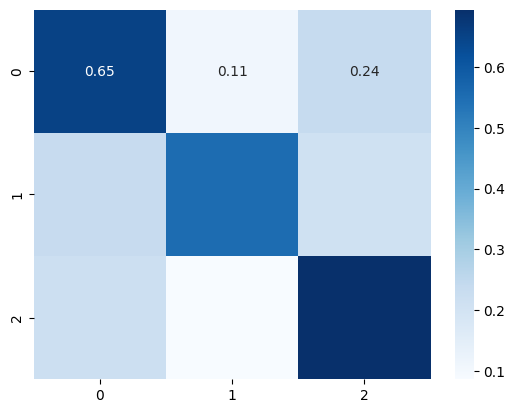

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, clfy_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalize to axis 1
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.show()

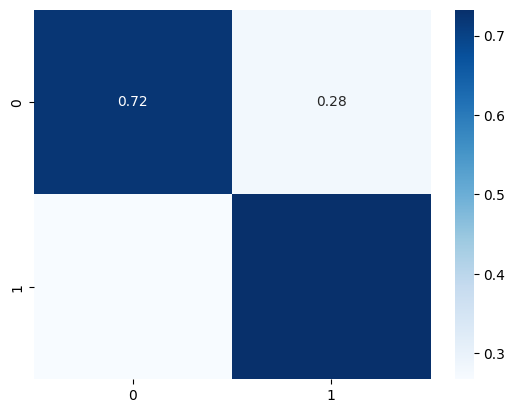

In [31]:
cm = confusion_matrix(svm_bi_pred, svm_bi_true_label)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.show()

> Here is my model trained on all classes not only binary (OneVsOne Version)

In [32]:
svm_ovo = SVM()
c = svm_ovo.fit_ovo(X_train,y_train)

classes 0 1
     pcost       dcost       gap    pres   dres
 0: -2.4018e+03 -1.9774e+03  9e+04  4e+01  6e-14
 1: -4.0604e+02 -1.8957e+03  6e+03  2e+00  5e-14
 2: -2.9674e+02 -1.2762e+03  2e+03  3e-01  1e-14
 3: -2.9627e+02 -5.1118e+02  2e+02  3e-02  9e-15
 4: -3.3375e+02 -4.1548e+02  9e+01  9e-03  8e-15
 5: -3.4761e+02 -3.9025e+02  5e+01  4e-03  8e-15
 6: -3.5446e+02 -3.7820e+02  2e+01  2e-03  8e-15
 7: -3.5830e+02 -3.7171e+02  1e+01  9e-04  8e-15
 8: -3.6111e+02 -3.6726e+02  6e+00  4e-04  8e-15
 9: -3.6280e+02 -3.6458e+02  2e+00  5e-05  1e-14
10: -3.6339e+02 -3.6382e+02  4e-01  1e-05  9e-15
11: -3.6355e+02 -3.6362e+02  7e-02  1e-06  1e-14
12: -3.6358e+02 -3.6358e+02  6e-03  6e-08  1e-14
13: -3.6358e+02 -3.6358e+02  2e-04  2e-09  1e-14
Optimal solution found.
classes 0 2
     pcost       dcost       gap    pres   dres
 0: -3.7079e+03 -2.6930e+03  1e+05  3e+01  8e-14
 1: -6.6296e+02 -2.5832e+03  9e+03  2e+00  8e-14
 2: -4.6119e+02 -1.8006e+03  2e+03  3e-01  2e-14
 3: -4.8515e+02 -6.8008

In [ ]:
y_ovo_pred,_ = svm_ovo.transform_ovo(X_test)

In [ ]:
accuracy_score(y_ovo_pred,y_test)

In [ ]:
cm = confusion_matrix(y_ovo_pred, y_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.show()

We observe that the result is close to the sklearn svc OneVsOne classifier :)))